<a href="https://colab.research.google.com/github/amin95621/AMIN-JAN/blob/main/Amindata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_log_error
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

In [3]:
#import data from csv
df = pd.read_excel('/content/data.xlsx')

In [4]:
#round off the data upto 2 decimal point
df.round(2)

,iv1,iv2,iv3,Md,DP
0,4.17,3.50,3.50,4.10,2.50
1,4.67,3.67,4.00,4.25,3.33
2,4.33,4.17,3.75,4.25,3.67
3,3.50,3.67,3.88,2.88,4.17
4,4.33,4.33,4.00,3.50,4.00
...,...,...,...,...,...
264,2.83,3.17,3.38,3.88,3.50
265,3.17,2.83,4.00,3.62,4.00
266,3.83,3.67,4.00,3.38,4.00
267,4.00,4.00,3.88,4.00,4.00


from matplotlib import pyplot as plt
_df_0['iv1'].plot(kind='hist', bins=20, title='iv1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['iv2'].plot(kind='hist', bins=20, title='iv2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['iv3'].plot(kind='hist', bins=20, title='iv3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Md'].plot(kind='hist', bins=20, title='Md')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='iv1', y='iv2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='iv2', y='iv3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='iv3', y='Md', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Md', y='DP ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['iv1'].plot(kind='line', figsize=(8, 4), title='iv1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['iv2'].plot(kind='line', figsize=(8, 4), title='iv2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['iv3'].plot(kind='line', figsize=(8, 4), title='iv3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Md'].plot(kind='line', figsize=(8, 4), title='Md')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
#describe
df.describe()

,iv1,iv2,iv3,Md,DP
count,269.000000,269.000000,269.000000,269.000000,269.000000
mean,3.917844,3.861214,4.026022,3.987825,4.035936
std,0.746842,0.798882,0.697658,0.751052,0.771425
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.750000,3.625000,3.666667
50%,4.000000,4.000000,4.000000,4.000000,4.166667
75%,4.400000,4.333333,4.500000,4.500000,4.666667
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#write correlation Matrix
df.corr()

,co,elect,urb,urb g,gdp,fos
co,1.000000,0.866591,0.983546,-0.941387,0.983546,0.979333
elect,0.866591,1.000000,0.864044,-0.842145,0.864044,0.860151
urb,0.983546,0.864044,1.000000,-0.960007,1.000000,0.997710
urb g,-0.941387,-0.842145,-0.960007,1.000000,-0.960007,-0.958310
gdp,0.983546,0.864044,1.000000,-0.960007,1.000000,0.997710
fos,0.979333,0.860151,0.997710,-0.958310,0.997710,1.000000


<Axes: >

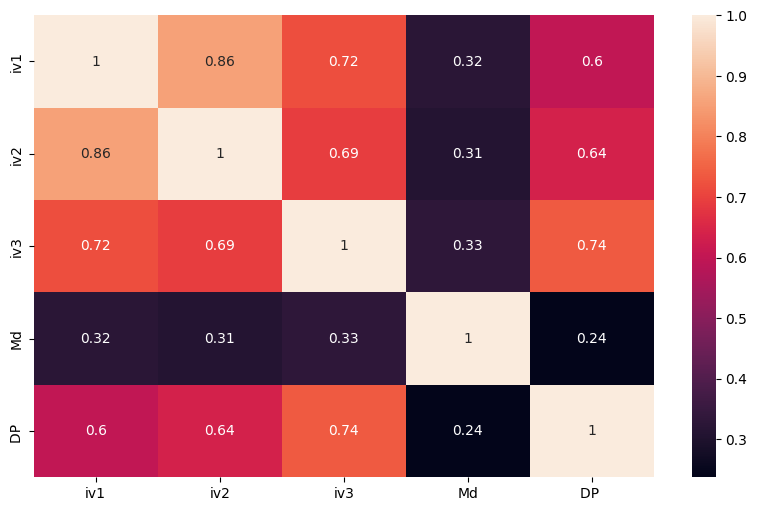

In [6]:
#draw the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [9]:
#split df into feature and Target variables
X = df.drop('DP ',axis=1)
y = df['DP ']

In [10]:
# Ensure all required imports are present
%pip install scikit-learn pandas tensorflow --quiet
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the build_model function
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Training and logging
results = []

for t_idx in range(3):  # Three experimental ANN runs
    train_rmses, test_rmses = [], []

    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = build_model(X_train.shape[1])
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                  callbacks=[early_stopping], verbose=0)

        y_train_pred = model.predict(X_train, verbose=0)
        y_test_pred = model.predict(X_test, verbose=0)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
        results.append([i+1, f"ANN-{t_idx+1}", train_rmse, test_rmse])

    results.append(['Mean', f"ANN-{t_idx+1}", np.mean(train_rmses), np.mean(test_rmses)])
    results.append(['SD', f"ANN-{t_idx+1}", np.std(train_rmses), np.std(test_rmses)])

results_df = pd.DataFrame(results, columns=['Network', 'Model', 'Training RMSE', 'Testing RMSE'])
pivot_df = results_df.pivot(index='Network', columns='Model')
pivot_df.columns = [f'{col[1]} {col[0]}' for col in pivot_df.columns.values]
pivot_df = pivot_df.reset_index()

pd.set_option('display.float_format', lambda x: f'{x:.3f}')
print(pivot_df)
%pip install scikit-learn pandas tensorflow --quiet
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the build_model function
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Training and logging
results = []

for t_idx in range(3):  # Three experimental ANN runs
    train_rmses, test_rmses = [], []

    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = build_model(X_train.shape[1])
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

      model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2,
                  callbacks=[early_stopping], verbose=0)

        y_train_pred = model.predict(X_train, verbose=0)
        y_test_pred = model.predict(X_test, verbose=0)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
        results.append([i+1, f"ANN-{t_idx+1}", train_rmse, test_rmse])

    results.append(['Mean', f"ANN-{t_idx+1}", np.mean(train_rmses), np.mean(test_rmses)])
    results.append(['SD', f"ANN-{t_idx+1}", np.std(train_rmses), np.std(test_rmses)])

results_df = pd.DataFrame(results, columns=['Network', 'Model', 'Training RMSE', 'Testing RMSE'])
pivot_df = results_df.pivot(index='Network', columns='Model')
pivot_df.columns = [f'{col[1]} {col[0]}' for col in pivot_df.columns.values]
pivot_df = pivot_df.reset_index()

pd.set_option('display.float_format', lambda x: f'{x:.3f}')
print(pivot_df)


   Network  ANN-1 Training RMSE  ANN-2 Training RMSE  ANN-3 Training RMSE  \
0        1                0.568                0.574                0.581   
1        2                0.593                0.587                0.586   
2        3                0.549                0.603                0.557   
3        4                0.606                0.568                0.661   
4        5                0.573                0.560                0.560   
5        6                0.600                0.616                0.594   
6        7                0.607                0.693                0.600   
7        8                0.617                0.575                0.562   
8        9                0.558                0.630                0.598   
9       10                0.571                0.581                0.610   
10    Mean                0.584                0.599                0.591   
11      SD                0.022                0.038                0.029   

KeyboardInterrupt: 

# RMSE for model **B** **bold text**

In [15]:
df =pd.read_excel('/content/data.xlsx')

In [16]:
df.head()

,iv1,iv2,iv3,Md,DP
0,4.167,3.500,3.500,4.100,2.500
1,4.667,3.667,4.000,4.250,3.333
2,4.333,4.167,3.750,4.250,3.667
3,3.500,3.667,3.875,2.875,4.167
4,4.333,4.333,4.000,3.500,4.000


In [17]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1jYgl9ml2seo4EQPicuOdVRjoxnkyXQq79O3ACJNpZqM/edit#gid=0


In [18]:
#remove Md column
df = df.drop('Md', axis=1)

In [20]:
df.head()

,iv1,iv2,iv3,DP
0,4.167,3.500,3.500,2.500
1,4.667,3.667,4.000,3.333
2,4.333,4.167,3.750,3.667
3,3.500,3.667,3.875,4.167
4,4.333,4.333,4.000,4.000


In [21]:
#split df into feature and Target variables
X = df.drop('DP',axis=1)
y = df['DP']

In [24]:
# Ensure all required imports are present
%pip install scikit-learn pandas tensorflow --quiet
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the build_model function
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Training and logging
results = []

for t_idx in range(3):  # Three experimental ANN runs
    train_rmses, test_rmses = [], []

    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = build_model(X_train.shape[1])
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                  callbacks=[early_stopping], verbose=0)

        y_train_pred = model.predict(X_train, verbose=0)
        y_test_pred = model.predict(X_test, verbose=0)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
        results.append([i+1, f"ANN-{t_idx+1}", train_rmse, test_rmse])

    results.append(['Mean', f"ANN-{t_idx+1}", np.mean(train_rmses), np.mean(test_rmses)])
    results.append(['SD', f"ANN-{t_idx+1}", np.std(train_rmses), np.std(test_rmses)])

results_df = pd.DataFrame(results, columns=['Network', 'Model', 'Training RMSE', 'Testing RMSE'])
pivot_df = results_df.pivot(index='Network', columns='Model')
pivot_df.columns = [f'{col[1]} {col[0]}' for col in pivot_df.columns.values]
pivot_df = pivot_df.reset_index()

pd.set_option('display.float_format', lambda x: f'{x:.3f}')
print(pivot_df)

   Network  ANN-1 Training RMSE  ANN-2 Training RMSE  ANN-3 Training RMSE  \
0        1                0.549                0.554                0.582   
1        2                0.540                0.526                0.542   
2        3                0.567                0.584                0.577   
3        4                0.598                0.561                0.567   
4        5                0.531                0.583                0.560   
5        6                0.555                0.526                0.515   
6        7                0.583                0.560                0.546   
7        8                0.525                0.546                0.547   
8        9                0.546                0.543                0.544   
9       10                0.593                0.550                0.650   
10    Mean                0.559                0.553                0.563   
11      SD                0.024                0.019                0.034   

Model **A**


📊 Relative Importance Table (ANN - Jiaoye8):
                                             iv1                    iv2  \
1                          -0.040091592178991595     0.2075245667888118   
2                            0.14568956011024717   0.033095097790279214   
3                            0.25576854698023055    0.03150814655793595   
4                            0.03553750521071793    0.16678455348233168   
5                            0.11539694999274139   -0.00647435146926083   
6                            0.08012067092715983     0.1638036126603702   
7                           0.003682445778058252  -0.008731923993892133   
8                          -0.015327003410283669    0.26313866608705627   
9                             0.2798164955770597    0.10954172298950635   
10                           0.01614771552841704    0.10721357579987796   
Average importance           0.08767412945153566    0.10674036666930165   
Normalized importance (%)                    55%      

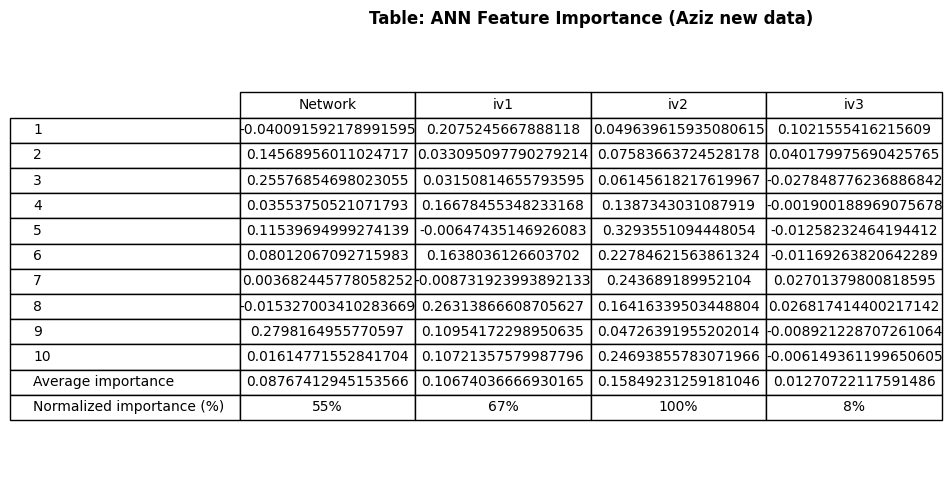

In [13]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/data.xlsx")

# Define features and target
features = ['iv1','iv2','iv3','Md']
target = 'DP '

df = df[features + [target]].dropna()

X = df[features].values
y = df[target].values

# Normalize
X_scaled = MinMaxScaler().fit_transform(X)
y_scaled = MinMaxScaler().fit_transform(y.reshape(-1, 1)).flatten()

# Store importance results
importances_list = []

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=seed)

    model = MLPRegressor(hidden_layer_sizes=(64,), max_iter=500, random_state=seed)
    model.fit(X_train, y_train)

    # Use permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=seed)
    importances_list.append(result.importances_mean)

# Convert to DataFrame
importance_df = pd.DataFrame(importances_list, columns=features)
importance_df.index = np.arange(1, 11)

# Average and normalized
average = importance_df.mean()
normalized = 100 * average / average.max()

importance_df.loc['Average importance'] = average
importance_df.loc['Normalized importance (%)'] = normalized.round(0).astype(int).astype(str) + '%'

# Format for output
formatted = importance_df.round(3).astype(str)
formatted.loc['Normalized importance (%)'] = normalized.round(0).astype(int).astype(str) + '%'

# Display
print("\n📊 Relative Importance Table (ANN - Jiaoye8):")
print(formatted)

# Plot table as image
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(cellText=formatted.values,
                 colLabels=['Network'] + features,
                 rowLabels=formatted.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.3)

plt.title("Table: ANN Feature Importance (Aziz new data)", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("ann_feature_importance.png", dpi=300)

# Model **B**


📊 Relative Importance Table (ANN - Jiaoye8):
                                             iv1                    iv2  \
1                            0.21355250623967806    0.07640048260689258   
2                            0.06968249778518608    0.08934897195135957   
3                          -0.005592422293276289     0.3612511238731074   
4                            0.06778136799982849     0.2610247170331314   
5                            0.37305696611731565  -0.004427483910759466   
6                            0.05139222956577605     0.4086376790481053   
7                          -0.010099715350193305     0.2797341693448585   
8                            0.09032266780219772     0.3048683717601941   
9                             0.0944973753165366     0.6429880817222543   
10                          -0.01811826749738702    0.29732691922785914   
Average importance            0.0926475205685662    0.27171530326570026   
Normalized importance (%)                    34%      

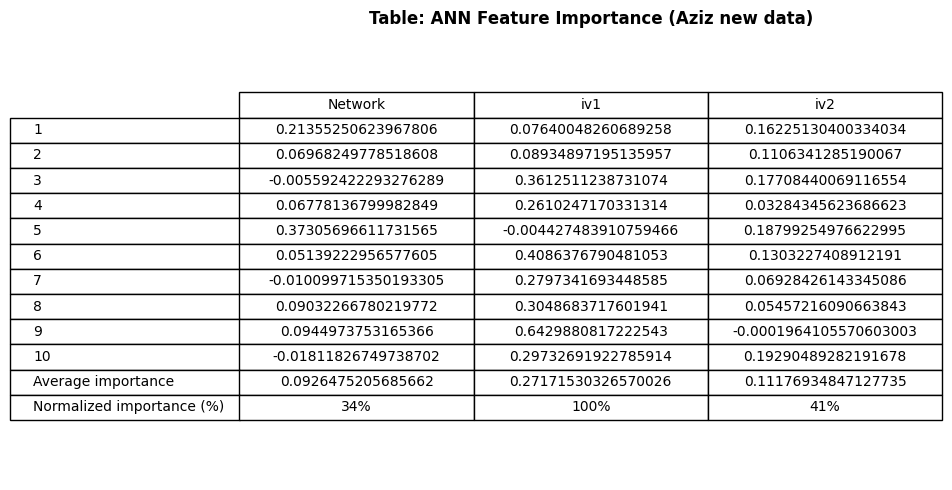

In [14]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/data.xlsx")

# Define features and target
features = ['iv1','iv2','iv3',]
target = 'DP '

df = df[features + [target]].dropna()

X = df[features].values
y = df[target].values

# Normalize
X_scaled = MinMaxScaler().fit_transform(X)
y_scaled = MinMaxScaler().fit_transform(y.reshape(-1, 1)).flatten()

# Store importance results
importances_list = []

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=seed)

    model = MLPRegressor(hidden_layer_sizes=(64,), max_iter=500, random_state=seed)
    model.fit(X_train, y_train)

    # Use permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=seed)
    importances_list.append(result.importances_mean)

# Convert to DataFrame
importance_df = pd.DataFrame(importances_list, columns=features)
importance_df.index = np.arange(1, 11)

# Average and normalized
average = importance_df.mean()
normalized = 100 * average / average.max()

importance_df.loc['Average importance'] = average
importance_df.loc['Normalized importance (%)'] = normalized.round(0).astype(int).astype(str) + '%'

# Format for output
formatted = importance_df.round(3).astype(str)
formatted.loc['Normalized importance (%)'] = normalized.round(0).astype(int).astype(str) + '%'

# Display
print("\n📊 Relative Importance Table (ANN - Jiaoye8):")
print(formatted)

# Plot table as image
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(cellText=formatted.values,
                 colLabels=['Network'] + features,
                 rowLabels=formatted.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.3)

plt.title("Table: ANN Feature Importance (Aziz new data)", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("ann_feature_importance.png", dpi=300)